In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from pandas.tools.plotting import scatter_matrix
from datetime import datetime
import operator
%matplotlib inline

In [10]:
os.chdir("C:\\Users\\xzou\\Downloads\\processedData")
remove_time_intervals = [[[0,0],[5,40]], [[10,0],[14,40]], [[19,0],[23,40]]]

In [3]:
def read_data(in_path, direction):
    data = pd.read_csv(in_path)
    if direction == 0:
        data = data.drop([data.columns[0], data.columns[-1], data.columns[-3]], 1)
        return data
    elif direction == 1:
        data = data.drop([data.columns[0], data.columns[-1], data.columns[-4]], 1)
        return data
    else:
        print "Wrong value in the second parameter, must be in {'entry', 'exit'} \n"
        return

In [4]:
def remove_by_date(data, date_interval):
    """
    date_low_bound and date_high_bound are lists that tells
    the date, e.g. "2005-10-5" should be input as [2005, 10, 5]
    
    The input dataframe should have an attribute called time_window,
    whose value has the form "yyyy-mm-dd hh:mm:ss". And it should
    NOT have an attribute called "selection"
    """
    [date_low_bound, date_high_bound] = date_interval
    time_window = data["time_window"].tolist()
    ymd_time_window = [x.split(" ")[0] for x in time_window]
    ymd_list_time_window = [map(int, x.split("-")) for x in ymd_time_window]
    datetime_list = [datetime(x[0], x[1], x[2]) for x in ymd_list_time_window]
    low_datetime = datetime(date_low_bound[0], date_low_bound[1], date_low_bound[2])
    high_datetime = datetime(date_high_bound[0], date_high_bound[1], date_high_bound[2])
    remove_time_window = [True if x <= high_datetime and x >= low_datetime else False 
                          for x in datetime_list]
    data["selection"] = remove_time_window
    no_national_day_data = data.loc[data["selection"] == False]
    return no_national_day_data.drop("selection", 1)

In [5]:
def remove_by_date_intervals(data, date_intervals):
    for date_interval in date_intervals:
        data = remove_by_date(data, date_interval)
    return data

In [6]:
def datetime_hm(hour, minute):
    return datetime(1, 1, 1, hour, minute)

In [7]:
def remove_by_time(data, time_interval):
    """
    date_low_bound and date_high_bound are lists that tells
    the date, e.g. "2005-10-5" should be input as [2005, 10, 5]
    
    The input dataframe should have an attribute called time_window,
    whose value has the form "yyyy-mm-dd hh:mm". And it should
    NOT have an attribute called "selection"
    """
    [time_low_bound, time_high_bound] = time_interval
    time_window = data["time_window"].tolist()
    hm_time_window = [x.split(" ")[1] for x in time_window]
    hm_list_time_window = [map(int, x.split(":")) for x in hm_time_window]
    datetime_list = [datetime_hm(hour=x[0], minute=x[1]) for x in hm_list_time_window]
    low_datetime = datetime_hm(hour=time_low_bound[0], minute=time_low_bound[1])
    high_datetime = datetime_hm(hour=time_high_bound[0], minute=time_high_bound[1])
    remove_time_window = [True if x <= high_datetime and x >= low_datetime else False 
                          for x in datetime_list]
    data["selection"] = remove_time_window
    no_national_day_data = data.loc[data["selection"] == False]
    no_national_day_data.drop("selection", 1, inplace=True)
    return no_national_day_data[["time_window", "volume"]]

In [8]:
def remove_by_time_intervals(data, time_intervals):
    for time_interval in time_intervals:
        data = remove_by_time(data, time_interval)
    return data

In [9]:
def show_selected_day(data, date):
    time_window_list = data["time_window"].tolist()
    ymd_time_window = [x.split(" ")[0] for x in time_window_list]
    bool_selection = [True if x == date else False for x in ymd_time_window]
    data["selection"] = bool_selection
    data = data[data["selection"] == True]
    data.drop("selection", 1, inplace=True)
    if data.empty:
        print("The input date does not exist")
        return
#     return data
    data.plot(x="time_window", y="volume", figsize=(10,5))

In [14]:
def find_outliers(input_path, direction, remove_dates):
    data = read_data(input_path, direction)
    data_removing_dates = remove_by_date_intervals(data.copy(deep=True), remove_dates)
    data_removing_dates_times = remove_by_time_intervals(data_removing_dates.copy(deep=True), remove_time_intervals)
    return data_removing_dates_times

In [36]:
data = find_outliers("Tollgate2_entry.csv", 0,
                                []
#                                 [[[2016,10,1],[2016,10,7]], [[2016,9,20],[2016,9,20]]]
                               )

C:\Users\xzou\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


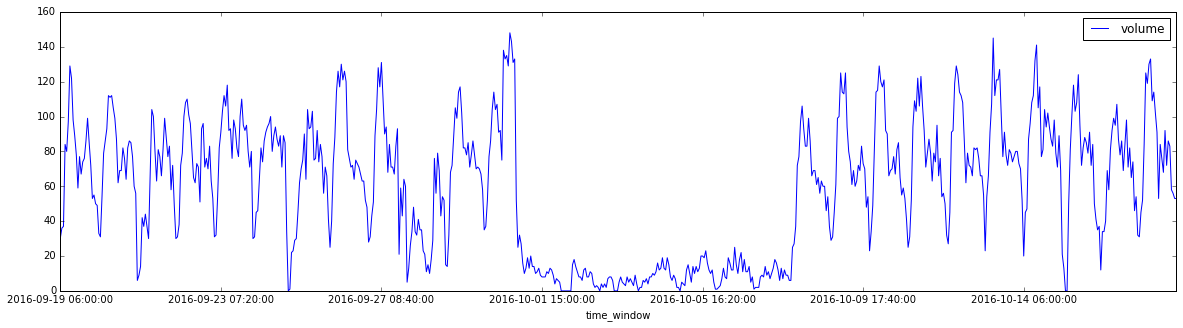

In [37]:
data.plot(x="time_window", y="volume", figsize=(20,5))

C:\Users\xzou\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


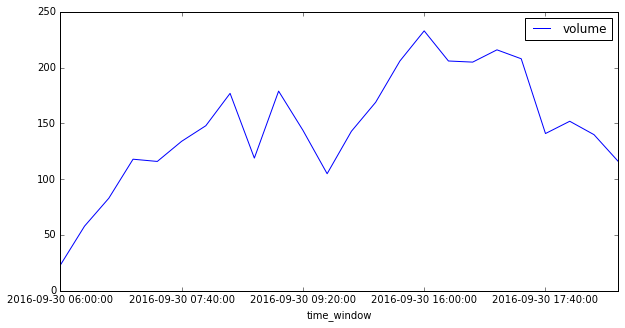

In [35]:
show_selected_day(data.copy(True), "2016-09-30")